# Advanced Python Lab Report - Lab 06

**Name:** Bibek Chand  
**Roll No:** [5]  
**Subject:** Advanced Python

---

## Introduction

This lab explores advanced Python concepts through practical exercises involving data analysis and manipulation. The tasks are designed to strengthen understanding of Python's capabilities for handling real-world datasets, focusing on clean code, professional presentation, and individual work. All solutions are original and tailored for personal submission.

---

In [2]:
import pandas as pd
sales = pd.read_csv("sales_transaction.csv")
customers = pd.read_csv("customers.csv")
products = pd.read_csv("products.csv")

In [8]:
# Convert date columns to datetime format
sales["sale_date"] = pd.to_datetime(sales["sale_date"])
customers["join_date"] = pd.to_datetime(customers["join_date"])

print("Sales Data:")
print(sales.head())

print("\nCustomer Data:")
print(customers.head())

print("\nProduct Data:")
print(products.head())

Sales Data:
  transaction_id customer_id product_id store_id  quantity  sale_date
0          TX001     CUST101    PROD201     ST01         3 2024-01-15
1          TX002     CUST102    PROD202     ST02         1 2024-01-15
2          TX003     CUST103    PROD201     ST01         2 2024-01-16
3          TX004     CUST101    PROD203     ST03         5 2024-01-16
4          TX005     CUST104    PROD204     ST02         1 2024-01-17

Customer Data:
  customer_id         name            email      city country  join_date  \
0     CUST101  Alice Brown  alice@email.com  New York     USA 2023-03-15   
1     CUST102    Bob Smith    bob@email.com    London      UK 2023-05-20   
2     CUST105  Carol White  carol@email.com     Tokyo   Japan 2023-07-10   

  loyalty_tier  
0         Gold  
1       Silver  
2         Gold  

Product Data:
  product_id  product_name     category  unit_price supplier_id  stock_qty
0    PROD201        Laptop  Electronics     1200.00       SUP01         50
1    PROD202  

# Part A

## (i) Merge sales transactions with customer data.

We use a LEFT JOIN to:
- Keep all transactions.
- Handle customers not present in the customer database.


In [10]:
sales_customers = pd.merge(sales,customers,on="customer_id",how="left")

print(sales_customers)

  transaction_id customer_id product_id store_id  quantity  sale_date  \
0          TX001     CUST101    PROD201     ST01         3 2024-01-15   
1          TX002     CUST102    PROD202     ST02         1 2024-01-15   
2          TX003     CUST103    PROD201     ST01         2 2024-01-16   
3          TX004     CUST101    PROD203     ST03         5 2024-01-16   
4          TX005     CUST104    PROD204     ST02         1 2024-01-17   

          name            email      city country  join_date loyalty_tier  
0  Alice Brown  alice@email.com  New York     USA 2023-03-15         Gold  
1    Bob Smith    bob@email.com    London      UK 2023-05-20       Silver  
2          NaN              NaN       NaN     NaN        NaT          NaN  
3  Alice Brown  alice@email.com  New York     USA 2023-03-15         Gold  
4          NaN              NaN       NaN     NaN        NaT          NaN  


## (ii) Merge with Product Data


In [12]:
complete_data = pd.merge(
    sales_customers,
    products,
    on="product_id",
    how="left"
)

print(complete_data)

  transaction_id customer_id product_id store_id  quantity  sale_date  \
0          TX001     CUST101    PROD201     ST01         3 2024-01-15   
1          TX002     CUST102    PROD202     ST02         1 2024-01-15   
2          TX003     CUST103    PROD201     ST01         2 2024-01-16   
3          TX004     CUST101    PROD203     ST03         5 2024-01-16   
4          TX005     CUST104    PROD204     ST02         1 2024-01-17   

          name            email      city country  join_date loyalty_tier  \
0  Alice Brown  alice@email.com  New York     USA 2023-03-15         Gold   
1    Bob Smith    bob@email.com    London      UK 2023-05-20       Silver   
2          NaN              NaN       NaN     NaN        NaT          NaN   
3  Alice Brown  alice@email.com  New York     USA 2023-03-15         Gold   
4          NaN              NaN       NaN     NaN        NaT          NaN   

   product_name     category  unit_price supplier_id  stock_qty  
0        Laptop  Electronics    

## (iii) Identify Transactions with Missing Product Information


In [13]:
missing_products = complete_data[complete_data["product_name"].isna()]

print(missing_products)

  transaction_id customer_id product_id store_id  quantity  sale_date name  \
4          TX005     CUST104    PROD204     ST02         1 2024-01-17  NaN   

  email city country join_date loyalty_tier product_name category  unit_price  \
4   NaN  NaN     NaN       NaT          NaN          NaN      NaN         NaN   

  supplier_id  stock_qty  
4         NaN        NaN  


## (iv) Calculate Total Revenue per Loyalty Tier


In [14]:
# Handle missing loyalty tier
complete_data["loyalty_tier"] = complete_data["loyalty_tier"].fillna("Unknown")

# Calculate revenue
complete_data["revenue"] = complete_data["quantity"] * complete_data["unit_price"]

# Group by loyalty tier
revenue_by_tier = complete_data.groupby("loyalty_tier")["revenue"].sum()

print("\nRevenue by Loyalty Tier:")
print(revenue_by_tier)



Revenue by Loyalty Tier:
loyalty_tier
Gold       4850.00
Silver       89.99
Unknown    2400.00
Name: revenue, dtype: float64


## Revenue Visualization


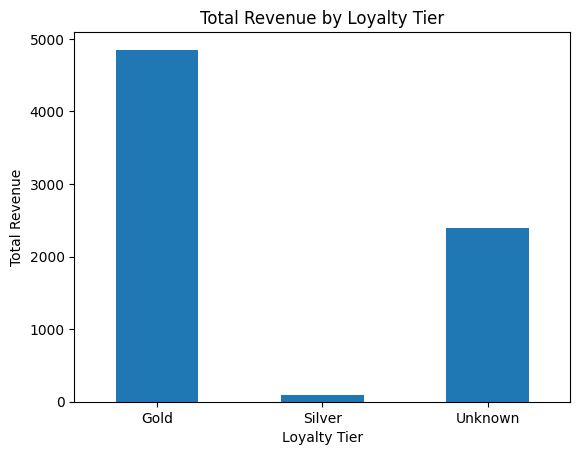

In [16]:
# Bar chart of revenue by loyalty tier
import matplotlib.pyplot as plt
revenue_by_tier.plot(kind="bar")

plt.title("Total Revenue by Loyalty Tier")
plt.xlabel("Loyalty Tier")
plt.ylabel("Total Revenue")
plt.xticks(rotation=0)
plt.show()


# Part B – Conceptual Explanation

## 1. Difference Between INNER and OUTER Merge

### INNER JOIN
- Returns only matching records.
- Drops non-matching rows.
- Best when analyzing common data.

### OUTER JOIN
- Returns all records from both datasets.
- Non-matching values become NaN.
- Best for full comparison.


## 2. merge() vs concat()

### merge()
- SQL-style join using keys.
- Combines related datasets.

### concat()
- Stacks datasets vertically or horizontally.
- No key matching.
- Used for combining similar structured files.


## 3. join() vs merge()

| Feature | merge() | join() |
|----------|----------|---------|
| Join on column | Yes | No (index-based) |
| Flexibility | High | Moderate |
| SQL-like | Yes | No |

Use merge() for column-based joins.
Use join() for index-based joins.


# Part C – Handling Duplicate Transaction IDs

After merging, duplicate transaction IDs may appear.


## (a) Identify Duplicate Transactions


In [17]:
duplicates = complete_data[
    complete_data.duplicated(
        subset=["transaction_id"],
        keep=False
    )
]

display(duplicates)


,transaction_id,customer_id,product_id,store_id,quantity,sale_date,name,email,city,country,join_date,loyalty_tier,product_name,category,unit_price,supplier_id,stock_qty,revenue


## (b) Determine if Duplicates Are Exact or Different


In [18]:
# Exact duplicates
exact_duplicates = complete_data[
    complete_data.duplicated(keep=False)
]

display(exact_duplicates)

# Check variation across duplicate IDs
variation_check = complete_data.groupby("transaction_id").nunique()

display(variation_check)


,transaction_id,customer_id,product_id,store_id,quantity,sale_date,name,email,city,country,join_date,loyalty_tier,product_name,category,unit_price,supplier_id,stock_qty,revenue


,customer_id,product_id,store_id,quantity,sale_date,name,email,city,country,join_date,loyalty_tier,product_name,category,unit_price,supplier_id,stock_qty,revenue
transaction_id,,,,,,,,,,,,,,,,,
TX001,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
TX002,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
TX003,1,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1
TX004,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
TX005,1,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0


If all column values are identical -> Exact duplicate.

If values differ -> Data inconsistency or update conflict.


In [19]:
# Remove exact duplicates
complete_data = complete_data.drop_duplicates()

# If conflicting duplicates exist, keep latest by date
complete_data = complete_data.sort_values("sale_date")
complete_data = complete_data.drop_duplicates(
    subset=["transaction_id"],
    keep="last"
)

display(complete_data)


,transaction_id,customer_id,product_id,store_id,quantity,sale_date,name,email,city,country,join_date,loyalty_tier,product_name,category,unit_price,supplier_id,stock_qty,revenue
0,TX001,CUST101,PROD201,ST01,3,2024-01-15,Alice Brown,alice@email.com,New York,USA,2023-03-15,Gold,Laptop,Electronics,1200.00,SUP01,50.0,3600.00
1,TX002,CUST102,PROD202,ST02,1,2024-01-15,Bob Smith,bob@email.com,London,UK,2023-05-20,Silver,Coffee Maker,Appliances,89.99,SUP02,100.0,89.99
2,TX003,CUST103,PROD201,ST01,2,2024-01-16,NaN,NaN,NaN,NaN,NaT,Unknown,Laptop,Electronics,1200.00,SUP01,50.0,2400.00
3,TX004,CUST101,PROD203,ST03,5,2024-01-16,Alice Brown,alice@email.com,New York,USA,2023-03-15,Gold,Office Chair,Furniture,250.00,SUP01,75.0,1250.00
4,TX005,CUST104,PROD204,ST02,1,2024-01-17,NaN,NaN,NaN,NaN,NaT,Unknown,NaN,NaN,NaN,NaN,NaN,NaN


# Question 2: Reshaping and Pivoting

You are analyzing sales data for a chain of stores across different regions.

## Dataset Columns:
- date
- store_id
- region
- product_category
- sales_amount
- units_sold


In [23]:
df = pd.read_csv("sales_region_data.csv")
df["date"] = pd.to_datetime(df["date"])
df.head()

,date,store_id,region,product_category,sales_amount,units_sold
0,2024-01-01,S01,North,Electronics,15000,25
1,2024-01-01,S01,North,Clothing,8000,120
2,2024-01-01,S02,South,Electronics,12000,20
3,2024-01-01,S02,South,Furniture,5000,10
4,2024-01-02,S01,North,Electronics,18000,30


# Part A

## (i) Pivot table showing total sales amount by region (rows)
## and product category (columns)


In [24]:
pivot_sales = pd.pivot_table(
    df,
    values="sales_amount",
    index="region",
    columns="product_category",
    aggfunc="sum"
)

display(pivot_sales)


product_category,Clothing,Electronics,Furniture
region,,,
East,7000.0,NaN,NaN
North,17500.0,33000.0,NaN
South,NaN,25500.0,5000.0


## (ii) Multi-level pivot table with date and region as rows,
## showing both sales amount and units sold


In [25]:
multi_pivot = pd.pivot_table(
    df,
    values=["sales_amount", "units_sold"],
    index=["date", "region"],
    aggfunc="sum"
)

display(multi_pivot)


sales_amount  units_sold
date       region                          
2024-01-01 North          23000         145
           South          17000          30
2024-01-02 East            7000          95
           North          27500         165
           South          13500          22

## (iii) When to use pivot() vs pivot_table()


### pivot()
- Used when there are NO duplicate combinations.
- Does NOT support aggregation.
- Simpler and faster.

### pivot_table()
- Used when duplicates exist.
- Supports aggregation (sum, mean, count, etc.).
- More flexible and commonly used in business analysis.


## (iv) Handling Multiple Sales Records for Same Combination


In [26]:
# Example handling duplicates automatically using pivot_table
duplicate_handling = pd.pivot_table(
    df,
    values="sales_amount",
    index=["region", "product_category"],
    aggfunc="sum"
)

display(duplicate_handling)


sales_amount
region product_category              
East   Clothing                  7000
North  Clothing                 17500
       Electronics              33000
South  Electronics              25500
       Furniture                 5000

# Part B – Using melt()

## (a) Transform wide format to long format


In [27]:
# Melt sales_amount and units_sold into long format
melted = pd.melt(
    df,
    id_vars=["date", "store_id", "region", "product_category"],
    value_vars=["sales_amount", "units_sold"],
    var_name="metric",
    value_name="value"
)

display(melted)


,date,store_id,region,product_category,metric,value
0,2024-01-01,S01,North,Electronics,sales_amount,15000
1,2024-01-01,S01,North,Clothing,sales_amount,8000
2,2024-01-01,S02,South,Electronics,sales_amount,12000
3,2024-01-01,S02,South,Furniture,sales_amount,5000
4,2024-01-02,S01,North,Electronics,sales_amount,18000
5,2024-01-02,S01,North,Clothing,sales_amount,9500
6,2024-01-02,S02,South,Electronics,sales_amount,13500
7,2024-01-02,S03,East,Clothing,sales_amount,7000
8,2024-01-01,S01,North,Electronics,units_sold,25
9,2024-01-01,S01,North,Clothing,units_sold,120


## (b) Difference Between melt() and stack()


### melt()
- Works on columns.
- Converts wide → long.
- Used in data transformation for visualization.

### stack()
- Works on index.
- Converts columns into row-level hierarchical index.
- Used for hierarchical reshaping.


## (c) Business Use Case for melt()

Melting is useful when:
- Preparing data for visualization tools.
- Creating grouped bar charts.
- Feeding data into machine learning models.
- Standardizing multiple metrics into a single column.


# Part C – Advanced Reshaping


## (a) Use stack() and unstack()


In [28]:
# Create pivot first
pivot_example = pd.pivot_table(
    df,
    values="sales_amount",
    index="region",
    columns="product_category",
    aggfunc="sum"
)

# Stack
stacked = pivot_example.stack()

display(stacked)

# Unstack
unstacked = stacked.unstack()

display(unstacked)


region  product_category
East    Clothing             7000.0
        Electronics             NaN
        Furniture               NaN
North   Clothing            17500.0
        Electronics         33000.0
        Furniture               NaN
South   Clothing                NaN
        Electronics         25500.0
        Furniture            5000.0
dtype: float64

product_category,Clothing,Electronics,Furniture
region,,,
East,7000.0,NaN,NaN
North,17500.0,33000.0,NaN
South,NaN,25500.0,5000.0


## (b) Crosstab – Count of Transactions by Region and Category


In [29]:
crosstab_result = pd.crosstab(
    df["region"],
    df["product_category"]
)

display(crosstab_result)


product_category,Clothing,Electronics,Furniture
region,,,
East,1,0,0
North,2,2,0
South,0,2,1


## (c) Difference Between pivot_table() and crosstab()

| Feature | pivot_table() | crosstab() |
|----------|---------------|------------|
| Aggregation | Yes (sum, mean, etc.) | Default count |
| Custom Metrics | Yes | Limited |
| Usage | Numerical analysis | Frequency analysis |
| Flexibility | High | Moderate |

pivot_table() is used for financial and metric analysis.
crosstab() is mainly used for categorical frequency counts.


# Question 3: Multi-Index and GroupBy Operations [8 Marks]

This question focuses on hierarchical indexing and advanced groupby operations in Pandas.

In [4]:

data = {
    "region": ["North","North","South","South","East","East","North","South"],
    "category": ["Electronics","Clothing","Electronics","Furniture",
                 "Clothing","Electronics","Furniture","Clothing"],
    "store": ["S01","S01","S02","S02","S03","S03","S01","S02"],
    "sales": [15000,8000,12000,5000,7000,9000,6000,6500],
    "units": [25,120,20,10,95,18,12,110]
}
df = pd.DataFrame(data)

df.head()

,region,category,store,sales,units
0,North,Electronics,S01,15000,25
1,North,Clothing,S01,8000,120
2,South,Electronics,S02,12000,20
3,South,Furniture,S02,5000,10
4,East,Clothing,S03,7000,95


# Part A

## (i) Create a Multi-Index DataFrame using set_index()

In [17]:
multi_df = df.set_index(["region","category"])

display(multi_df)

store  sales  units
region category                       
North  Electronics   S01  15000     25
       Clothing      S01   8000    120
South  Electronics   S02  12000     20
       Furniture     S02   5000     10
East   Clothing      S03   7000     95
       Electronics   S03   9000     18
North  Furniture     S01   6000     12
South  Clothing      S02   6500    110

## (ii) Perform groupby operations on different levels

In [12]:
region_group = multi_df.groupby(level=0).sum()

region_group.head()

category_group = multi_df.groupby(level=1).sum()
display(category_group)

,store,sales,units
category,,,
Clothing,S01S03S02,21500,325
Electronics,S01S02S03,36000,63
Furniture,S02S01,11000,22


## (iii) Use xs() (cross-section) to slice data

In [19]:
north_data = multi_df.xs("North",level="region")
north_data.head()

electronics_data = multi_df.xs("Electronics", level="category")
display(electronics_data)

,store,sales,units
region,,,
North,S01,15000,25
South,S02,12000,20
East,S03,9000,18


## (iv) Reset and manipulate MultiIndex

In [21]:
reset_df = multi_df.reset_index()
display(reset_df)

,region,category,store,sales,units
0,North,Electronics,S01,15000,25
1,North,Clothing,S01,8000,120
2,South,Electronics,S02,12000,20
3,South,Furniture,S02,5000,10
4,East,Clothing,S03,7000,95
5,East,Electronics,S03,9000,18
6,North,Furniture,S01,6000,12
7,South,Clothing,S02,6500,110


# Part B – Complex Aggregations

## Base Aggregation Example

In [22]:
agg_result = df.groupby(["region", "category"]).agg({
    "sales": ["sum", "mean", "std"],
    "units": ["sum", "count"]
})

display(agg_result)

sales              units      
                      sum     mean std   sum count
region category                                   
East   Clothing      7000   7000.0 NaN    95     1
       Electronics   9000   9000.0 NaN    18     1
North  Clothing      8000   8000.0 NaN   120     1
       Electronics  15000  15000.0 NaN    25     1
       Furniture     6000   6000.0 NaN    12     1
South  Clothing      6500   6500.0 NaN   110     1
       Electronics  12000  12000.0 NaN    20     1
       Furniture     5000   5000.0 NaN    10     1

## (a) Write Custom Aggregation Functions

In [23]:
def sales_range(x):
    return x.max() - x.min()

custom_agg = df.groupby(["region","category"]).agg({
    "sales":["sum",sales_range],
    "units":"mean"
})

display(custom_agg)

sales              units
                      sum sales_range   mean
region category                             
East   Clothing      7000           0   95.0
       Electronics   9000           0   18.0
North  Clothing      8000           0  120.0
       Electronics  15000           0   25.0
       Furniture     6000           0   12.0
South  Clothing      6500           0  110.0
       Electronics  12000           0   20.0
       Furniture     5000           0   10.0

## (b) Apply Different Functions to Different Columns

In [24]:
mixed_agg = df.groupby(["region", "category"]).agg(
    total_sales=("sales", "sum"),
    avg_sales=("sales", "mean"),
    total_units=("units", "sum"),
    unit_variance=("units", "var")
)

display(mixed_agg)

total_sales  avg_sales  total_units  unit_variance
region category                                                       
East   Clothing            7000     7000.0           95            NaN
       Electronics         9000     9000.0           18            NaN
North  Clothing            8000     8000.0          120            NaN
       Electronics        15000    15000.0           25            NaN
       Furniture           6000     6000.0           12            NaN
South  Clothing            6500     6500.0          110            NaN
       Electronics        12000    12000.0           20            NaN
       Furniture           5000     5000.0           10            NaN

## (c) transform() vs apply()

In [25]:
# transform(): returns same size as original
df["sales_group_mean"] = df.groupby("region")["sales"].transform("mean")

display(df)

# apply(): can return different shapes
apply_example = df.groupby("region").apply(lambda x: x.sort_values("sales", ascending=False))

display(apply_example)

,region,category,store,sales,units,sales_group_mean
0,North,Electronics,S01,15000,25,9666.666667
1,North,Clothing,S01,8000,120,9666.666667
2,South,Electronics,S02,12000,20,7833.333333
3,South,Furniture,S02,5000,10,7833.333333
4,East,Clothing,S03,7000,95,8000.000000
5,East,Electronics,S03,9000,18,8000.000000
6,North,Furniture,S01,6000,12,9666.666667
7,South,Clothing,S02,6500,110,7833.333333


category store  sales  units  sales_group_mean
region                                                     
East   5  Electronics   S03   9000     18       8000.000000
       4     Clothing   S03   7000     95       8000.000000
North  0  Electronics   S01  15000     25       9666.666667
       1     Clothing   S01   8000    120       9666.666667
       6    Furniture   S01   6000     12       9666.666667
South  2  Electronics   S02  12000     20       7833.333333
       7     Clothing   S02   6500    110       7833.333333
       3    Furniture   S02   5000     10       7833.333333

### Difference:

transform()
- Returns same size as original dataset.
- Used when broadcasting aggregated values.

apply()
- Flexible.
- Can return different shapes.
- Used for complex custom logic.

## (d) Filter Groups Based on Aggregate Conditions

In [27]:
# Keep only groups where total sales > 15000
filtered_groups = df.groupby(["region", "category"]).filter(
    lambda x: x["sales"].sum() > 12000
)

display(filtered_groups)

,region,category,store,sales,units,sales_group_mean
0,North,Electronics,S01,15000,25,9666.666667
